<a href="https://colab.research.google.com/github/crew-guy/ml-with-tensorflow/blob/main/transfer_learning_tf_feature_extraction_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning with Tensorflow Part 1: Feature Extraction

Transfer learning is the process of leveraging an existing model architecture & patterns it has learnt, for our own problem

![image](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/transfer-learn.png)

There are 2 main benefits
1. Can use existing neural network architecture that is proven to work on a problem, similar to our own
2. Can leverage a neural network architecture & patterns which it has already learnt on similar data to our own, then we can adapt those patterns to our own data


In [2]:
# Are we running a GPU
!nvidia-smi

Thu Dec  1 16:46:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Downloading & becoming one with the data

We will only be working with 10% of the dataset for training

In [3]:
import zipfile

# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


# Unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2022-12-01 16:46:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  39.9MB/s    in 4.6s    

2022-12-01 16:46:13 (34.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in dirpath:{dirpath} ")

There are 2 directories and 0 files in dirpath:10_food_classes_10_percent 
There are 10 directories and 0 files in dirpath:10_food_classes_10_percent/train 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/ramen 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/sushi 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/ice_cream 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/chicken_curry 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/hamburger 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/steak 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/grilled_salmon 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/chicken_wings 
There are 0 directories and 75 files in dirpath:10_food_classes_10_percent/train/pizza 
There are 0 direct

## Creating data loaders (preparing the data)

We'll use the `ImageDataGenerator` class to load in images in batches

In [5]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [6]:
# Creating data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

training_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.2,
    rotation_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)

In [7]:
# Creating data sets for training and testing

IMAGE_SIZE= (224,224)
BATCH_SIZE = 32

train_data = training_datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMAGE_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
)

train_data_augmented = training_datagen_augmented.flow_from_directory(
    directory=train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE, 
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=BATCH_SIZE,
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 750 images belonging to 10 classes.
Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [17]:
IMAGE_SIZE+(3,)

(224, 224, 3)

In [8]:
train_data[7]

(array([[[[0.0627451 , 0.03529412, 0.01176471],
          [0.0627451 , 0.03137255, 0.01960784],
          [0.05882353, 0.03921569, 0.02352941],
          ...,
          [0.03137255, 0.01176471, 0.02745098],
          [0.03137255, 0.01176471, 0.02745098],
          [0.03137255, 0.01176471, 0.02745098]],
 
         [[0.06666667, 0.03921569, 0.01568628],
          [0.0627451 , 0.03137255, 0.01960784],
          [0.0627451 , 0.04313726, 0.02745098],
          ...,
          [0.03529412, 0.01568628, 0.03137255],
          [0.02745098, 0.00784314, 0.02352941],
          [0.03137255, 0.01176471, 0.02745098]],
 
         [[0.07450981, 0.04313726, 0.03137255],
          [0.06666667, 0.03529412, 0.02352941],
          [0.07058824, 0.0509804 , 0.03921569],
          ...,
          [0.03529412, 0.01568628, 0.03137255],
          [0.03137255, 0.01176471, 0.02745098],
          [0.03137255, 0.01176471, 0.02745098]],
 
         ...,
 
         [[0.09411766, 0.05490196, 0.05882353],
          [0.14901

## Setting up callbacks (things to run while our model trains)

Callbacks are tools that add extra functionality to your models during training, evaluation or inference. The most popular callbacks include

* Model performance dashboard using TensorBoard callback
* Saving the model as it trains, using the ModelCheckpoint callback
* Stop training the model once performance ceases to improve (before it trains too long & overfits), using the EarlyStopping callback

In [13]:
# Create a TensorBoard callback (functionized because we need to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to {log_dir}")
    return tensorboard_callback

## Creating models using Tensorflow hub

Till now, we have been creating our own tensorflow models from scratch - layer by layer

Now, we're going to do a similar process, except the majority of our model's layers are going to come from TensorFlow hub

We can also access pretrained models from TensorFlow Hub and pick the ones that are most suitable to our problem statement. Checkout models at https://tfhub.dev

Also, to know which model or paper is the best for a given problem statement, do checkout https://paperswithcode.com

Browsing the TensorFlow hub page & sorting for image classification, we found the following feature vector model link: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [14]:
 # Let's compare the following 2 models
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [29]:
def create_model(model_url, num_classes):
    """
    Takes in a TensorFlow hub model URL along with number of classes & returns an uncompiled Keras Sequential model


    Args:
        model_url(str): The url of the TensorFlow hub pre-trained model
        num_classes(int): The number of neurons in the final output layer, which is equal to the number of classes 

    Returns:
        An uncompiled Keras Sequential Model with model_url as the feature extraction layer 
        and a Dense output layer with the number of classes we want to train for
    """

    trainable_model = tf.keras.Sequential([
        hub.KerasLayer(model_url, input_shape=IMAGE_SIZE+(3,), trainable=False, name="feature_extraction_layer"),
        layers.Dense(num_classes, activation="softmax", name="output_layer")
    ])

    return trainable_model


### Creating & testing ResNet TensorFlow Hub Model & test it

In [30]:
train_data.num_classes

10

In [31]:
resnet_model = create_model(resnet_url, train_data.num_classes)

In [32]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [38]:
# Compile our resnet_model

resnet_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [39]:
resnet_history = resnet_model.fit(
    train_data,
    epochs=5,
    callbacks=[create_tensorboard_callback("board","resnet50V2")],
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Saving TensorBoard log files to board/resnet50V2/20221201-173859
Epoch 1/5
24/24 [==============================] - 29s 772ms/step - loss: 1.8065 - accuracy: 0.3960 - val_loss: 1.1595 - val_accuracy: 0.6272
Epoch 2/5
24/24 [==============================] - 16s 697ms/step - loss: 0.8615 - accuracy: 0.7507 - val_loss: 0.8293 - val_accuracy: 0.7352
Epoch 3/5
24/24 [==============================] - 16s 693ms/step - loss: 0.5912 - accuracy: 0.8253 - val_loss: 0.7523 - val_accuracy: 0.7552
Epoch 4/5
24/24 [==============================] - 16s 693ms/step - loss: 0.4641 - accuracy: 0.8747 - val_loss: 0.7024 - val_accuracy: 0.7696
Epoch 5/5
24/24 [==============================] - 16s 691ms/step - loss: 0.3686 - accuracy: 0.9213 - val_loss: 0.6771 - val_accuracy: 0.7796


In [42]:
loss = resnet_history.history["loss"]
loss

[1.8064535856246948,
 0.8615314364433289,
 0.5911805033683777,
 0.4640830159187317,
 0.368583083152771]

In [43]:
import matplotlib.pyplot as plt

In [44]:
def plot_learning_curves(history):
    """
    Takes in the history of a trained model & plots its learning curves

    """

    loss = history.history["loss"]
    val_loss=history.history["val_loss"]
    accuracy=history.history["accuracy"]
    val_accuracy=history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))

    # Plot the loss curve
    plt.figure(figsize=(10,7))
    plt.plot(epochs, loss, label="loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.xlabel("epochs")
    plt.legend()


    # Plot the accuracy curve
    plt.figure(figsize=(10,7))
    plt.plot(epochs, accuracy, label="accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.xlabel("epochs")
    plt.legend()


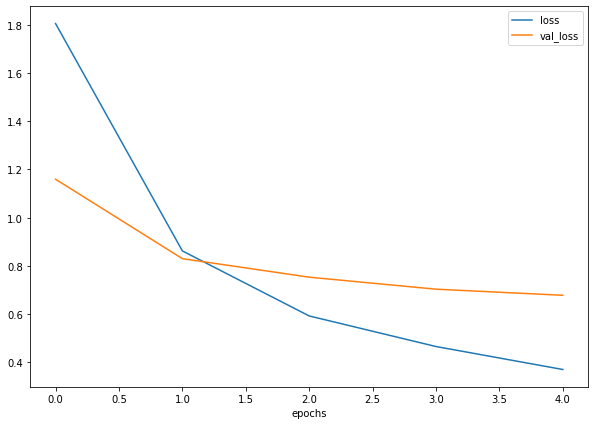

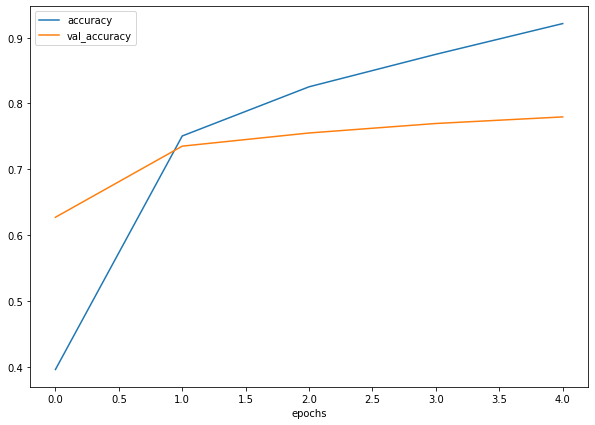

In [45]:
plot_learning_curves(resnet_history)

### Creating & testing a TensorFlow Hub EfficientNet model

In [46]:
### Creating & testing a TensorFlow Hub EfficientNet model
efficientnet_model = create_model(efficientnet_url, train_data.num_classes)

In [47]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [48]:
efficientnet_model.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [49]:
effnet_history = efficientnet_model.fit(
    train_data,
    callbacks=[create_tensorboard_callback("board", "effnetb01")],
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Saving TensorBoard log files to board/effnetb01/20221201-175553
Epoch 1/5
24/24 [==============================] - 28s 725ms/step - loss: 1.8428 - accuracy: 0.4213 - val_loss: 1.3136 - val_accuracy: 0.7120
Epoch 2/5
24/24 [==============================] - 15s 644ms/step - loss: 1.0672 - accuracy: 0.7680 - val_loss: 0.8768 - val_accuracy: 0.8132
Epoch 3/5
24/24 [==============================] - 15s 656ms/step - loss: 0.7587 - accuracy: 0.8347 - val_loss: 0.7029 - val_accuracy: 0.8392
Epoch 4/5
24/24 [==============================] - 16s 697ms/step - loss: 0.6111 - accuracy: 0.8627 - val_loss: 0.6116 - val_accuracy: 0.8540
Epoch 5/5
24/24 [==============================] - 15s 665ms/step - loss: 0.5164 - accuracy: 0.8880 - val_loss: 0.5601 - val_accuracy: 0.8616


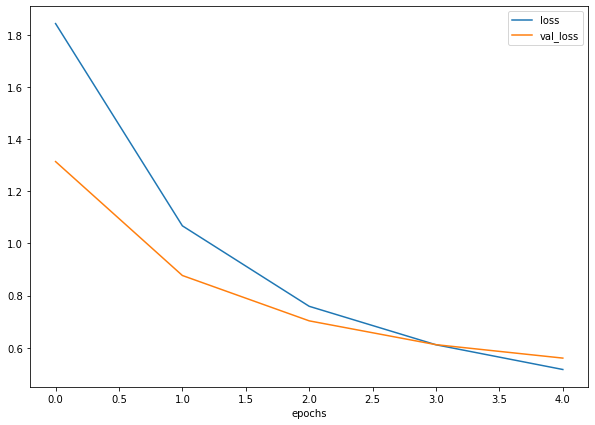

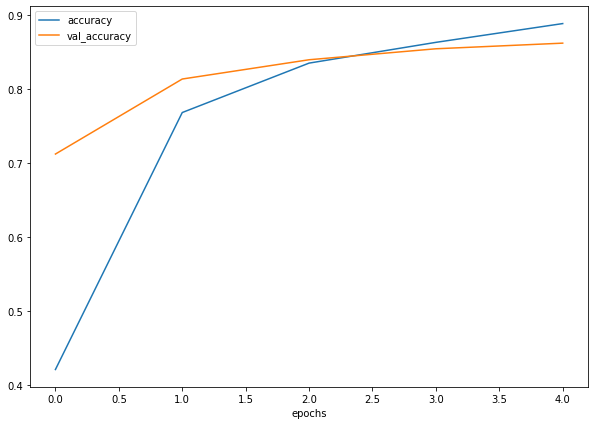

In [50]:
plot_learning_curves(effnet_history)

## Different types of transfer learning

* **"As is" transfer** - Directly take & use a pre-trained model with no changes whatsoever (eg: Using an ImageNet model trained on 1000s of ImageNet classes, none of our own)
* **"Feature extraction"** -Take the prelearned patterns of an existing model (eg: EfficientNetB0 trained on ImageNet) & adjust the output layer for our own classes (eg: 1000 classes of ImageNet -> 10 of our own classes)
* **"Fine tuning" transfer learning** - Take the prelearned patterns of an existing model & "fine-tune" many or all of the underlying layers (including new output layers)

![image](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/types-of-transer-learn.png)


In [51]:
# Thus, our 0th layer i.e. our feature extraction layer in efficient_net model has learned 309 sets of theta values 
# so there are 309 underlying layers that the existing EfficientNetB01 model (from TensorFlow Hub) was trained with
len(efficientnet_model.layers[0].weights)

309

## Comparing our models results using TensorBoard

> 🔑 **Note**: We can upload upload our model reports to https://tensorboard.dev but just be warned that it's a public repo where other's can see your work

In [1]:
!pip install -U tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!tensorboard dev upload --logdir ./board \
    --name "Food Images ML" \
    --description "Comparing ResNetV02 and EffNetB01 models"
    --one-shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./board

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=f0yukni8jInjxAdoSBm7WJX76KGiMa&prompt=consent&access_type=offline
Enter

Our TensorBoard experiments are uploaded publicly: https://tensorboard.dev/experiment/0LUQjpVJQIyga7I5l6YQFw/

In [ ]:
# Checkout what tensorboard experiments you have
!tensorboard dev list

In [ ]:
# To delete an experiment 
!tensorboard dev delete --experiment_id EXPERIMENT_ID 

In [ ]:
# Confirm whether the experiment has actually been deleted by listing experiments now
!tensorboard dev list